In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import bar_chart_race as bcr
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
import plotly.graph_objs as go

In [2]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'), ['Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'Chicago_Crimes_2017_to_2020.csv', 'Chicago_Crimes_2020_to_2023    .csv']))

C:\Users\Brian.DaSilva\AppData\Local\Temp\ipykernel_33756\4188645959.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'), ['Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'Chicago_Crimes_2017_to_2023.csv']))


In [28]:
df.sort_values(by='Date', ascending=False)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Updated On,Latitude,Longitude,Location,rank,Year
1011139,JE482457,2021-12-19 07:23:00,BATTERY,SIMPLE,SIDEWALK,True,True,921,9.0,58.0,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)",2.0,2021
1011155,JE475344,2021-12-11 20:00:00,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,612,6.0,71.0,09/27/2022 04:46:33 PM,41.753274,-87.652598,"(41.753274445, -87.652598299)",14.0,2021
1025583,JE469692,2021-12-07 21:07:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,1924,19.0,6.0,03/01/2022 03:48:55 PM,41.947228,-87.655380,"(41.947227653, -87.655380005)",9.0,2021
1011224,JF245842,2021-11-24 08:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,True,False,333,3.0,43.0,04/06/2023 05:00:16 PM,41.761219,-87.576192,"(41.761218589, -87.576191815)",16.0,2021
1027814,JE454261,2021-11-22 23:22:00,THEFT,ATTEMPT THEFT,STREET,False,False,812,8.0,64.0,11/29/2021 03:51:01 PM,41.777564,-87.769038,"(41.777563982, -87.769037848)",1.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198240,HJ560176,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2222,22.0,71.0,03/31/2006 10:03:38 PM,41.734717,-87.654377,"(41.734716977, -87.654377051)",1.0,2001
803756,HH691178,2001-01-01 00:00:00,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,False,914,9.0,58.0,08/17/2015 03:03:40 PM,41.815118,-87.686955,"(41.815117893, -87.686954793)",8.0,2001
986,HN555375,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,True,True,1021,10.0,29.0,03/11/2010 02:01:21 PM,41.863026,-87.709501,"(41.863025734, -87.709501406)",14.0,2001
1836193,HK830095,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,732,7.0,68.0,03/31/2006 10:03:38 PM,41.765054,-87.641686,"(41.765053677, -87.641686171)",1.0,2001


In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
df.drop(['Unnamed: 0', 'ID', 'IUCR', 'FBI Code', 'Block', 'Ward', 'X Coordinate', 'Y Coordinate', 'Year'],inplace=True, axis=1)

In [6]:
df.shape

(8989857, 14)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(8174888, 14)

In [12]:
df.drop_duplicates(subset=['Case Number'], inplace=True)

In [154]:
df.shape

(6507490, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8174888 entries, 1 to 1048574
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Community Area        float64
 10  Updated On            object 
 11  Latitude              object 
 12  Longitude             float64
 13  Location              object 
dtypes: bool(2), float64(3), int64(1), object(8)
memory usage: 826.4+ MB


In [10]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.head()

,Case Number,Date,Primary Type,Description,Location Description,Updated On,Latitude,Location
1,HM278933,03/01/2003 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,04/15/2016 08:55:02 AM,41.817229,"(41.817229156, -87.637328162)"
4,HM275615,05/01/2003 01:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,04/15/2016 08:55:02 AM,41.691785,"(41.691784636, -87.635115968)"
6,HM403711,01/01/2001 11:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,08/29/2006 03:46:28 AM,41.68702,"(41.687020002, -87.60844523)"
7,HM216293,03/15/2003 12:00:00 AM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,04/15/2016 08:55:02 AM,41.729712,"(41.729712374, -87.653158513)"
9,HM282389,01/01/2003 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,04/15/2016 08:55:02 AM,41.869772,"(41.869772159, -87.708180162)"


In [11]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['OTHER OFFENSE' 'THEFT' 'CRIM SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'MOTOR VEHICLE THEFT' 'SEX OFFENSE'
 'DECEPTIVE PRACTICE' 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'HOMICIDE'
 'ROBBERY' 'BATTERY' 'ARSON' 'BURGLARY' 'ASSAULT' 'NARCOTICS'
 'PUBLIC PEACE VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER' 'GAMBLING'
 'KIDNAPPING' 'WEAPONS VIOLATION' 'PROSTITUTION' 'INTIMIDATION'
 'LIQUOR LAW VIOLATION' 'STALKING' 'OBSCENITY' 'PUBLIC INDECENCY'
 'OTHER NARCOTIC VIOLATION' 'RITUALISM' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'CRIMINAL SEXUAL ASSAULT'] 35


In [13]:
df['Primary Type'] = df['Primary Type'].str.replace('NON - CRIMINAL','NON-CRIMINAL')

In [14]:
df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")

C:\Users\Brian.DaSilva\AppData\Local\Temp\ipykernel_33756\3992758225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")


In [15]:
df['Primary Type'] = df['Primary Type'].str.replace('NON-CRIMINAL ','NON-CRIMINAL')

In [16]:
df['Primary Type'] = df['Primary Type'].str.replace('MOTOR VEHICLE THEFT','THEFT')

In [17]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['OTHER OFFENSE' 'THEFT' 'CRIM SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE' 'DECEPTIVE PRACTICE'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'HOMICIDE' 'ROBBERY' 'BATTERY'
 'ARSON' 'BURGLARY' 'ASSAULT' 'NARCOTICS' 'PUBLIC PEACE VIOLATION'
 'INTERFERENCE WITH PUBLIC OFFICER' 'GAMBLING' 'KIDNAPPING'
 'WEAPONS VIOLATION' 'PROSTITUTION' 'INTIMIDATION' 'LIQUOR LAW VIOLATION'
 'STALKING' 'OBSCENITY' 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION'
 'RITUALISM' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIMINAL SEXUAL ASSAULT'] 32


In [19]:
df['rank'] = df.groupby('Primary Type')['Primary Type'].transform('count').rank(method="dense", ascending=False)

In [20]:
df.head(5)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Updated On,Latitude,Longitude,Location,rank
1,HM278933,03/01/2003 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,61.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)",6.0
4,HM275615,05/01/2003 01:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,49.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)",1.0
6,HM403711,01/01/2001 11:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,5.0,50.0,08/29/2006 03:46:28 AM,41.68702,-87.608445,"(41.687020002, -87.60844523)",15.0
7,HM216293,03/15/2003 12:00:00 AM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.0,73.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)",6.0
9,HM282389,01/01/2003 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.0,29.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)",1.0


In [21]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Group the data by year and count the number of crimes per year
yearly_counts = df.groupby('Year').size().reset_index(name='Count')

In [192]:
df = df[(df['Year'] >= 2002) & (df['Year'] <= 2023)]

In [22]:
df = df.sort_values(by='Date', ascending=False)

In [27]:
df.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Updated On,Latitude,Longitude,Location,rank,Year
1011139,JE482457,2021-12-19 07:23:00,BATTERY,SIMPLE,SIDEWALK,True,True,921,9.0,58.0,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)",2.0,2021
1011155,JE475344,2021-12-11 20:00:00,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,612,6.0,71.0,09/27/2022 04:46:33 PM,41.753274,-87.652598,"(41.753274445, -87.652598299)",14.0,2021
1025583,JE469692,2021-12-07 21:07:00,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,1924,19.0,6.0,03/01/2022 03:48:55 PM,41.947228,-87.655380,"(41.947227653, -87.655380005)",9.0,2021
1011224,JF245842,2021-11-24 08:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,True,False,333,3.0,43.0,04/06/2023 05:00:16 PM,41.761219,-87.576192,"(41.761218589, -87.576191815)",16.0,2021
1027814,JE454261,2021-11-22 23:22:00,THEFT,ATTEMPT THEFT,STREET,False,False,812,8.0,64.0,11/29/2021 03:51:01 PM,41.777564,-87.769038,"(41.777563982, -87.769037848)",1.0,2021


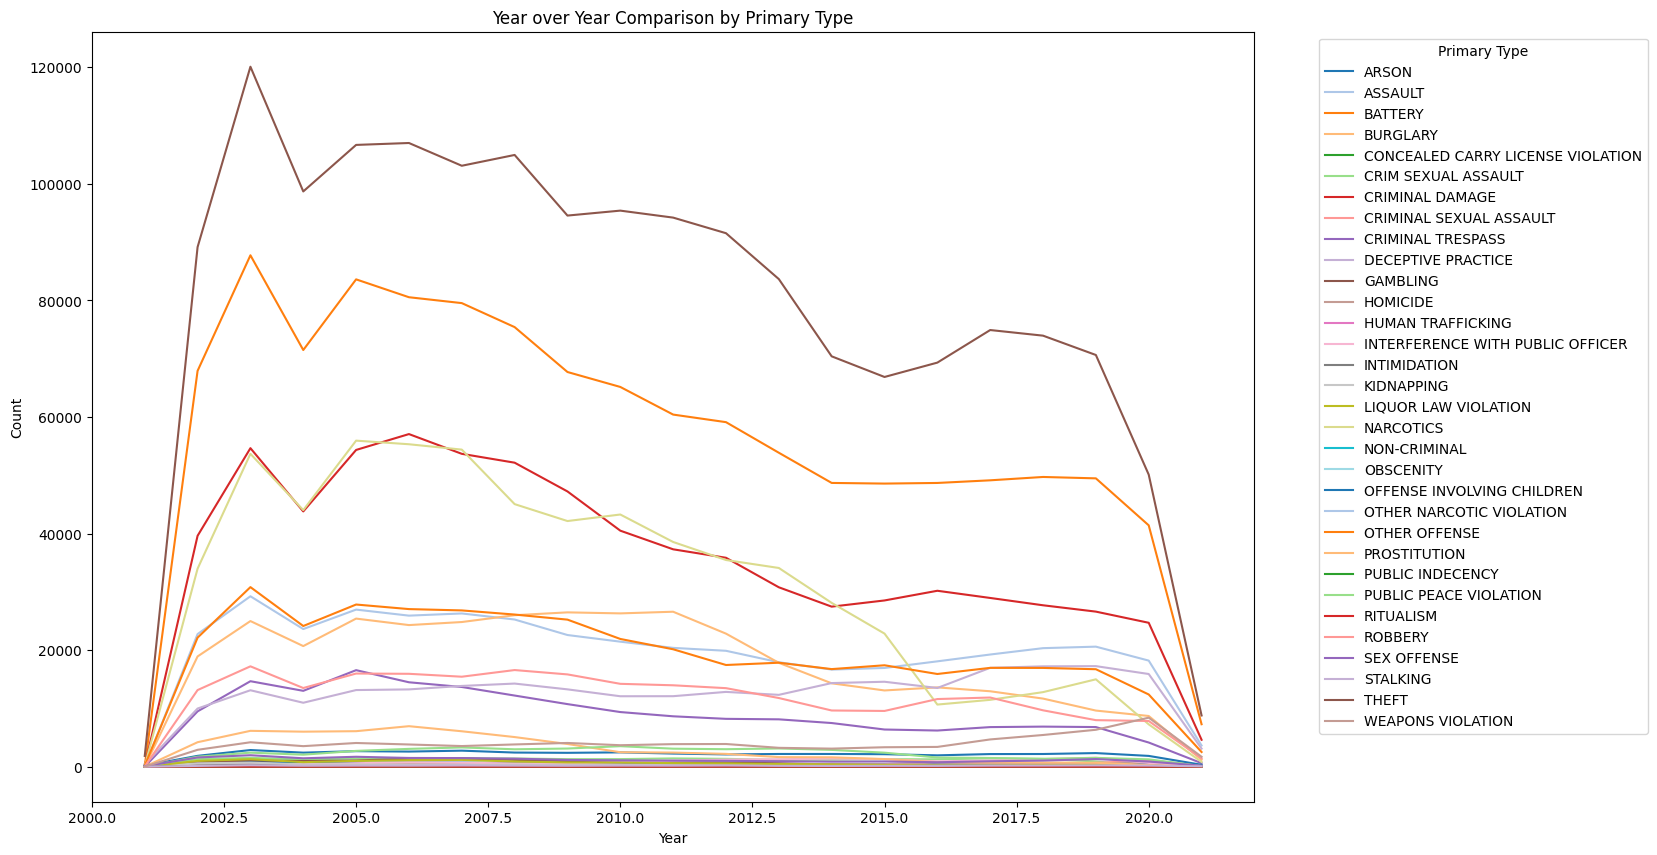

In [210]:
grouped_data = df.groupby(["Year", "Primary Type"]).size().reset_index(name="Count")
pivot_data = grouped_data.pivot_table(index="Year", columns="Primary Type", values="Count", fill_value=0)
pivot_data.plot(kind="line", figsize=(15, 10), title="Year over Year Comparison by Primary Type")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

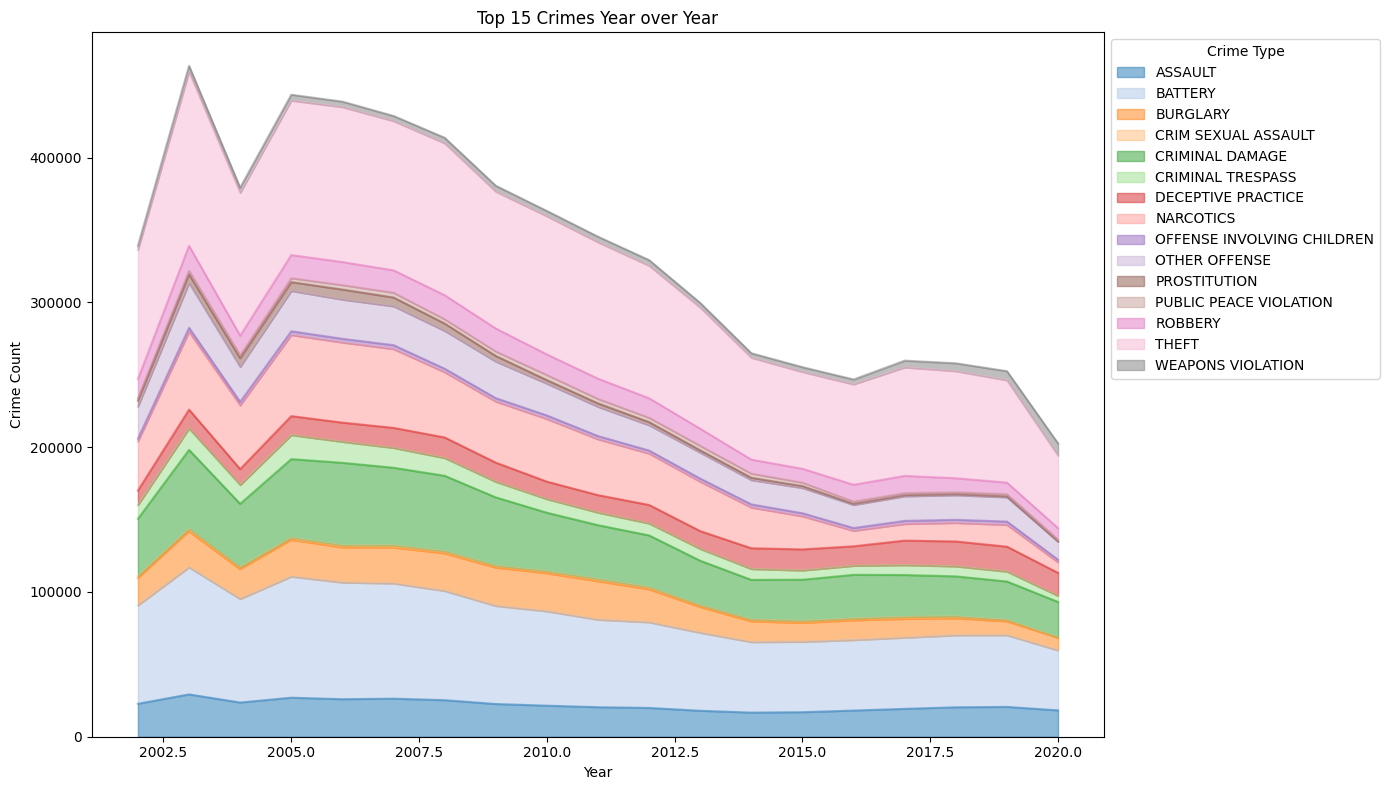

In [191]:
# Filter the dataframe to include only the top 15 crimes
top_15_crimes = df[df['rank'] <= 15]

# Group the data by year and primary type, and count the number of crimes per year for each primary type
yearly_counts = top_15_crimes.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to get the count of crimes per year for each primary type as columns
yearly_counts_pivot = yearly_counts.pivot_table(index='Year', columns='Primary Type', values='Count', fill_value=0)

# Create a ribbon chart (area chart) of the count of top 15 crimes per year
plt.figure(figsize=(14, 8))
sns.set_palette("tab20")
yearly_counts_pivot.plot.area(ax=plt.gca(), alpha=0.5)
plt.title('Top 15 Crimes Year over Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

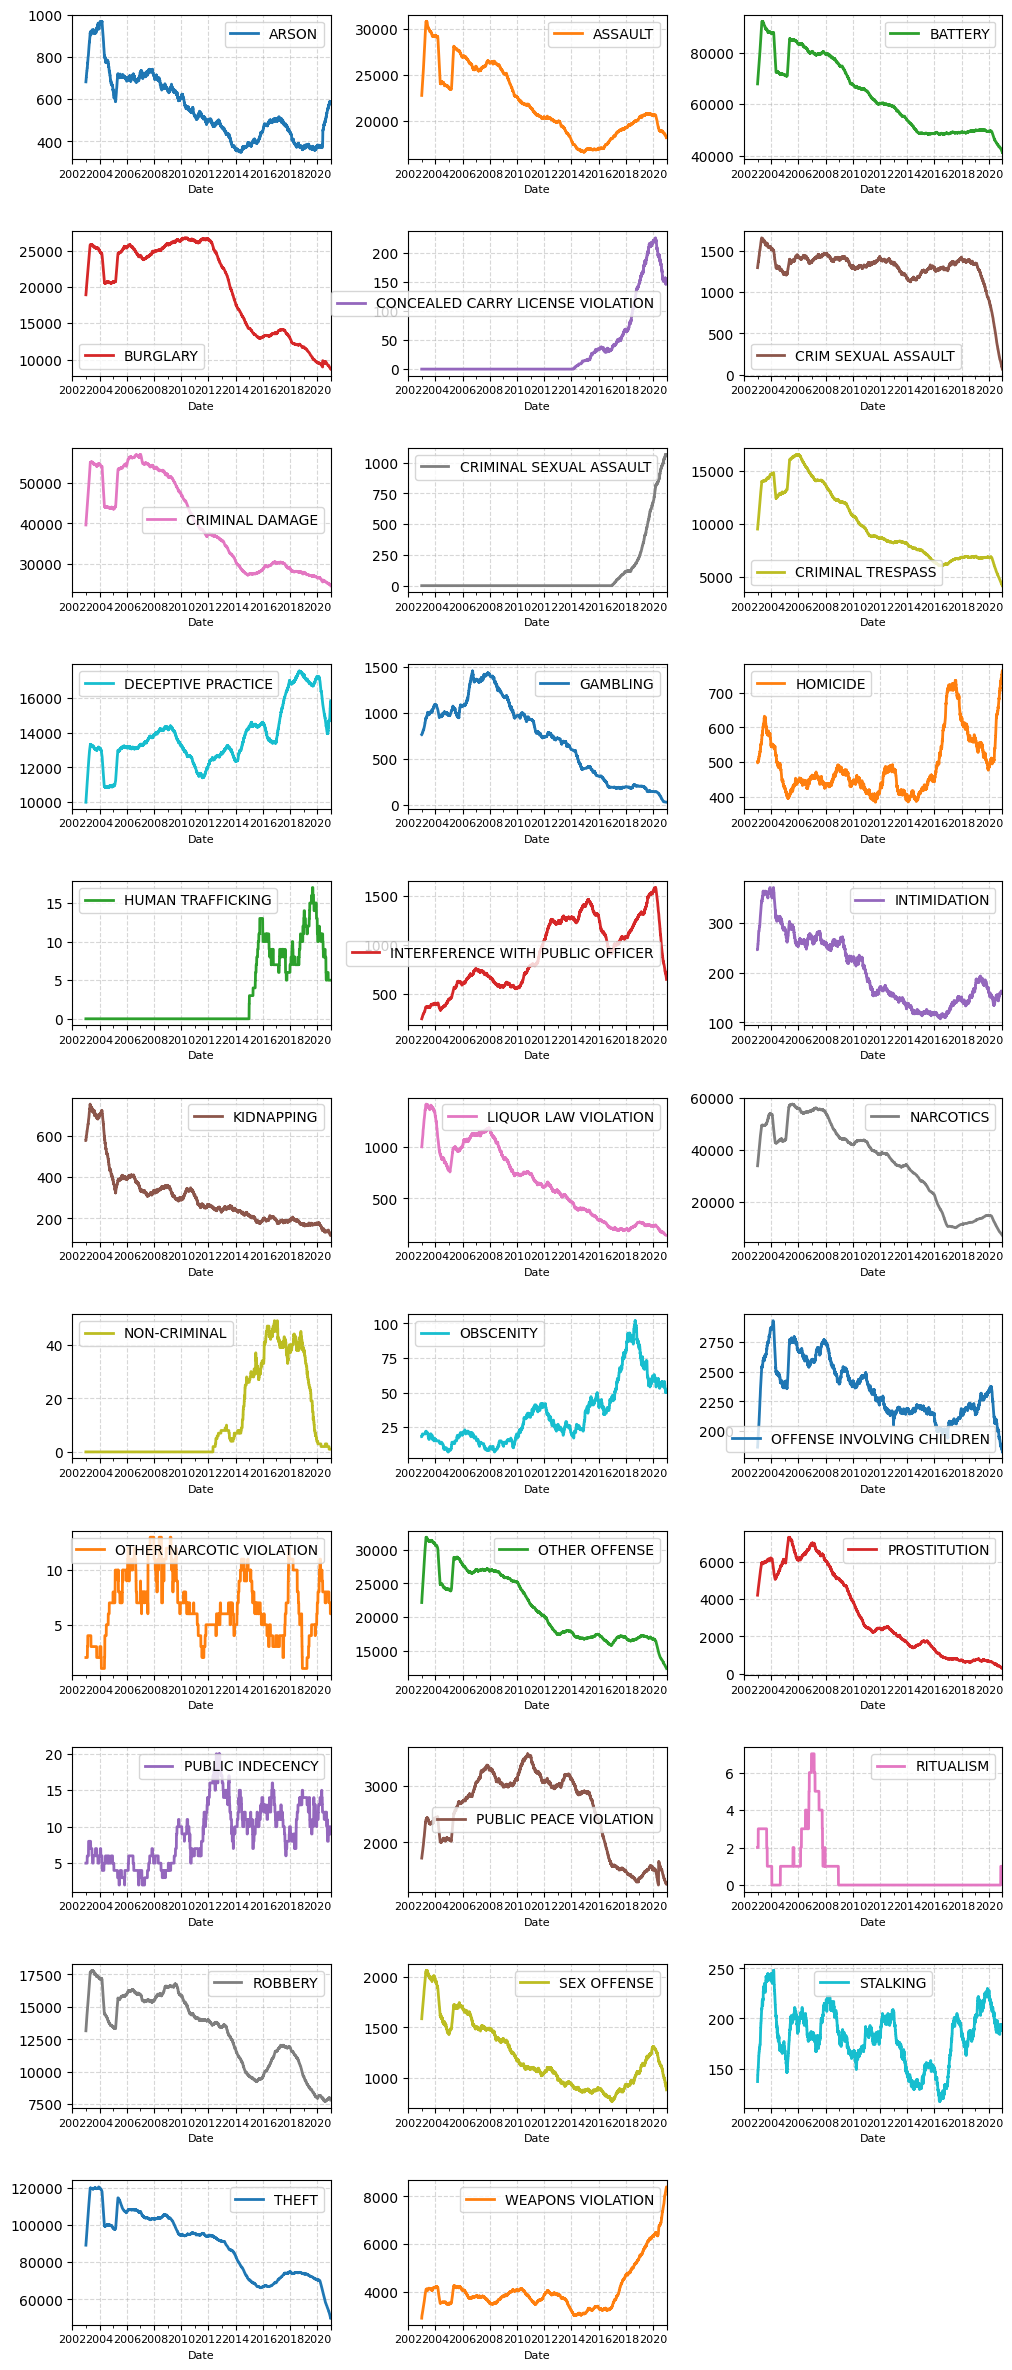

In [187]:
# Set custom color palette
sns.set_palette('husl', n_colors=len(df['Primary Type'].unique()))

crime_by_type = df.pivot_table('Case Number', aggfunc=np.size, columns='Primary Type', index=df['Date'].dt.date, fill_value=0)
crime_by_type.index = pd.DatetimeIndex(crime_by_type.index)
plot = crime_by_type.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, linewidth=2)

# Add gridlines and adjust x-axis label fontsize
for ax in plot.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    for label in ax.get_xticklabels():
        label.set_fontsize(8)
    
    # Add title for each subplot
    ax.set_title(ax.get_title(), fontsize=10, fontweight='bold', pad=12)

# Customize subplot border
plt.subplots_adjust(hspace=0.5, wspace=0.3)

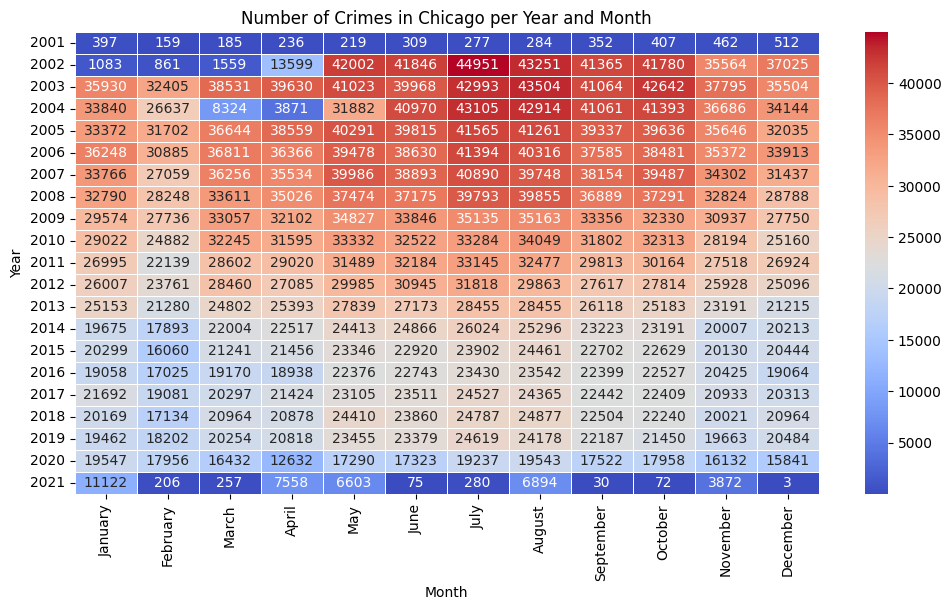

In [211]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

# Group the data by year and month
year_month_data = df.groupby(['Year', 'Month']).size().reset_index(name='IncidentCount')
year_month_data = year_month_data.pivot(index='Year', columns='Month', values='IncidentCount')

# Reorder the columns to match the chronological order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month_data = year_month_data[month_order]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(year_month_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Number of Crimes in Chicago per Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [212]:
# Filter the data to include rows with rank lower than 15
filtered_df = df[df['rank'] < 15]

grouped_data = filtered_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot_table(values='Count', index='Year', columns='Primary Type', fill_value=0)

bcr.bar_chart_race(df=pivoted_data, title='Top 15 Crime Types in Chicago Year Over Year')

C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [29]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the hour from the 'Date' column and create a new column 'Hour'
df['Hour'] = df['Date'].dt.hour

# Extract the day of the week from the 'Date' column and create a new column 'DayOfWeek'
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a new column 'TimeBlock' that groups hours into Morning, Afternoon, Evening, and Night
def get_time_block(hour):
    if 6 <= hour < 12:
        return 'Morning (6AM-12PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (1-6PM)'
    elif 18 <= hour < 24:
        return 'Evening (7-12AM)'
    else:
        return 'Night (1-5AM)'

df['TimeBlock'] = df['Hour'].apply(get_time_block)

# Create a pivot table with days of the week on columns and the count of crimes for each time block and day of the week
timeblock_counts = df.pivot_table(index='TimeBlock', columns='DayOfWeek', aggfunc='count', fill_value=0)['ID']

# Set custom labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

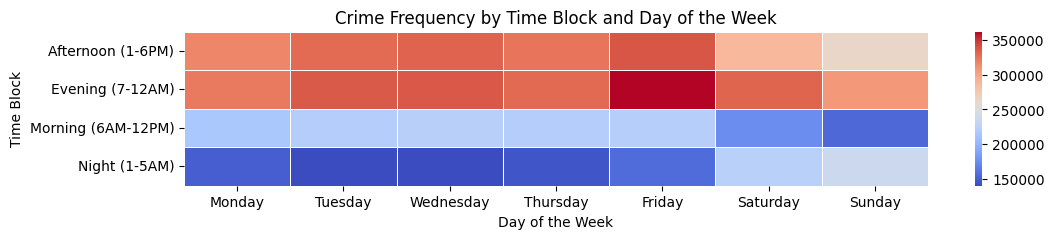

In [238]:
# Create a heatmap of crime frequency based on the time block and day of the week
plt.figure(figsize=(12, 2))
sns.heatmap(timeblock_counts, cmap='coolwarm', linewidths=0.5, xticklabels=day_labels)
plt.title('Crime Frequency by Time Block and Day of the Week')
plt.ylabel('Time Block')
plt.xlabel('Day of the Week')
plt.show()

In [110]:
geodata = df.sort_values(by='Date', ascending=False).head(5000)

In [111]:
from geopy.geocoders import ArcGIS
geolocator = ArcGIS(user_agent="geoapiExercises")

def extract_neighborhood(lat, lng):
    if lat is None or lng is None:
        return None
    location = geolocator.reverse((lat, lng))
    try:
        neighborhood = location.raw['Neighborhood']
    except KeyError:
        neighborhood = None
    return neighborhood

geodata['Neighborhood'] = geodata.apply(lambda row: extract_neighborhood(row['Latitude'], row['Longitude']), axis=1)

neighborhood_group = geodata.groupby('Neighborhood').size().reset_index(name='IncidentCount')
neighborhood_lat_lng = geodata.groupby('Neighborhood').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
neighborhood_data = neighborhood_group.merge(neighborhood_lat_lng, on='Neighborhood')

In [112]:
neighborhood_data

,Neighborhood,IncidentCount,Latitude,Longitude
0,,189,41.841485,-87.683212
1,Albany Park,32,41.966849,-87.719375
2,Andersonville,5,41.979355,-87.662712
3,Archer Heights,14,41.806583,-87.729933
4,Armour Square,4,41.837674,-87.633044
...,...,...,...,...
93,West Rogers Park,33,41.999072,-87.691639
94,West Town,38,41.898662,-87.675819
95,Wicker Park,46,41.908278,-87.682620
96,Woodlawn,31,41.779742,-87.606024


In [113]:
import folium
from folium.plugins import HeatMap

# Create a map centered on Chicago
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11)

# Prepare data for the heatmap (latitude, longitude, and intensity)
data = neighborhood_data[['Latitude', 'Longitude', 'IncidentCount']]
data = data.dropna()

# Create a heatmap and add it to the map
HeatMap(data, radius=15, blur=25).add_to(chicago_map)

chicago_map

In [218]:
aux = df.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4) * 100
aux.sort_values('Arrest', inplace=True)

trace = go.Bar(
    x=aux['Arrest (%)'],
    y=aux['Primary Type'],
    orientation='h',
    text=aux['Arrest (%)'].round(1).astype(str) + '%',
    textposition='outside',
    marker=dict(
        color=aux['Arrest (%)'],
        colorscale='Blugrn',
        line=dict(color='rgb(8,48,107)', width=1.5)
    ),
    opacity=0.8
)

layout = go.Layout(
    title='Arrested Rate in % per Type Crime in Chicago',
    xaxis=dict(title='Arrest Rate (%)', tickformat=".1f"),
    yaxis=dict(title='Primary Type'),
    margin=dict(l=200, r=50, t=100, b=50),
    plot_bgcolor='rgb(255, 255, 255)',  # Set the plot background color to white
    paper_bgcolor='rgb(255, 255, 255)',  # Set the paper background color to white
    width=1200,  # Set the width to 12 inches (each unit is equivalent to 100 pixels)
    height=800  # Set the height to 30 inches
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [224]:
grouped_data = df.groupby(["Year", "Arrest"]).size().reset_index(name="Count")
pivot_data = grouped_data.pivot_table(index="Year", columns="Arrest", values="Count", fill_value=0)
# Calculate the total counts per year
pivot_data['Total'] = pivot_data[False] + pivot_data[True]

# Calculate the percentage
pivot_data['Not Arrested (%)'] = (pivot_data[False] / pivot_data['Total']) * 100
pivot_data['Arrested (%)'] = (pivot_data[True] / pivot_data['Total']) * 100

# Select only the percentage columns
percentage_data = pivot_data[['Not Arrested (%)', 'Arrested (%)']]

trace_not_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Not Arrested (%)'],
    name='Not Arrested',
    text=percentage_data['Not Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(75,192,192)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

trace_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Arrested (%)'],
    name='Arrested',
    text=percentage_data['Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(52,152,219)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

data = [trace_not_arrested, trace_arrested]

layout = go.Layout(
    title="Yearly Comparison of Arrested vs Not Arrested",
    barmode='stack',
    xaxis=dict(title="Year"),
    yaxis=dict(title="Percentage"),
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    width=1200,  # Set the width to 12 inches (each unit is equivalent to 100 pixels)
    height=800  # Set the height to 30 inches
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [232]:
df["Hour"] = df["Date"].dt.hour

array(['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'ASSAULT', 'NARCOTICS'],
      dtype=object)

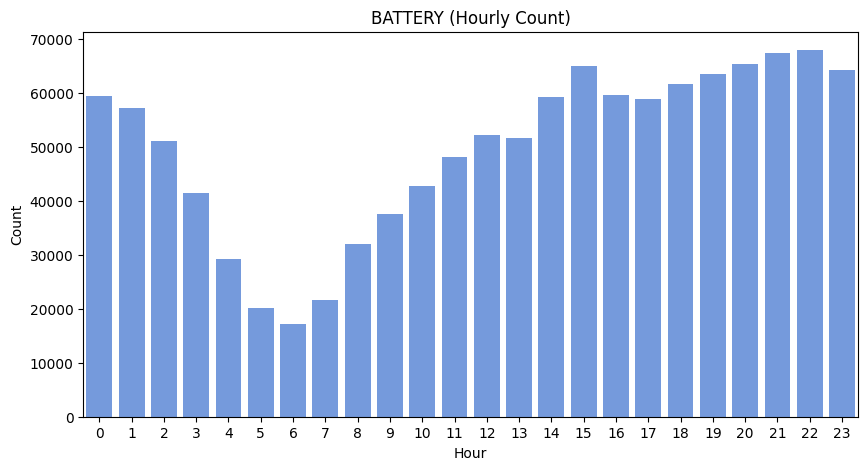

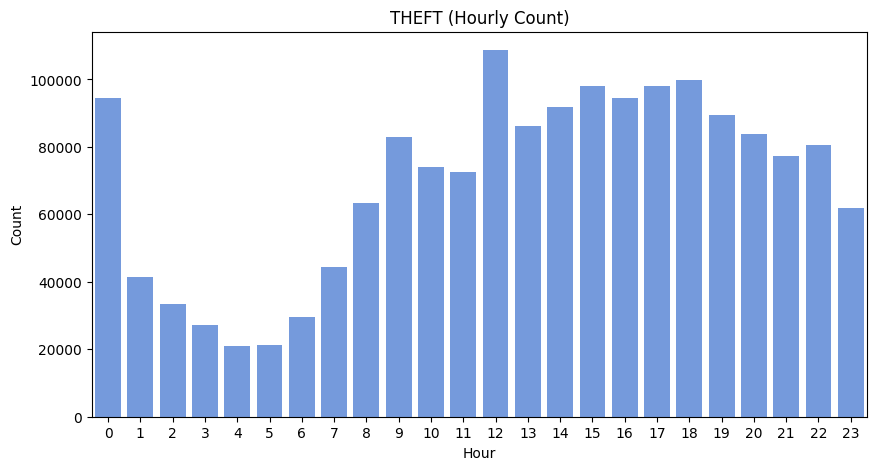

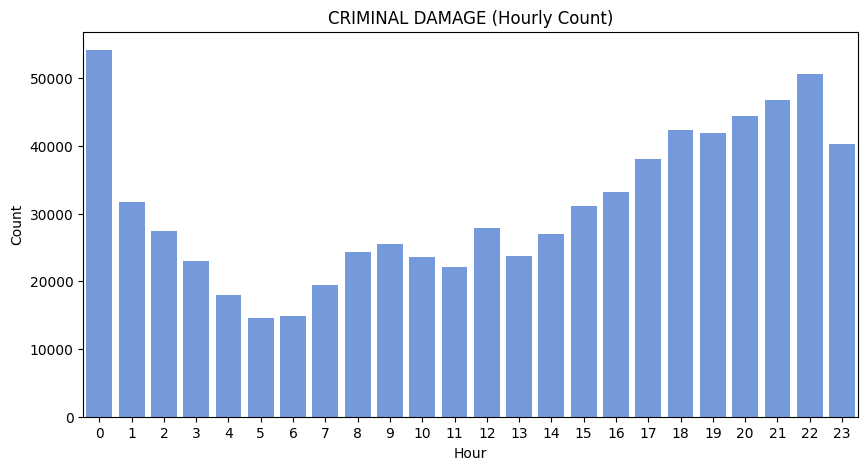

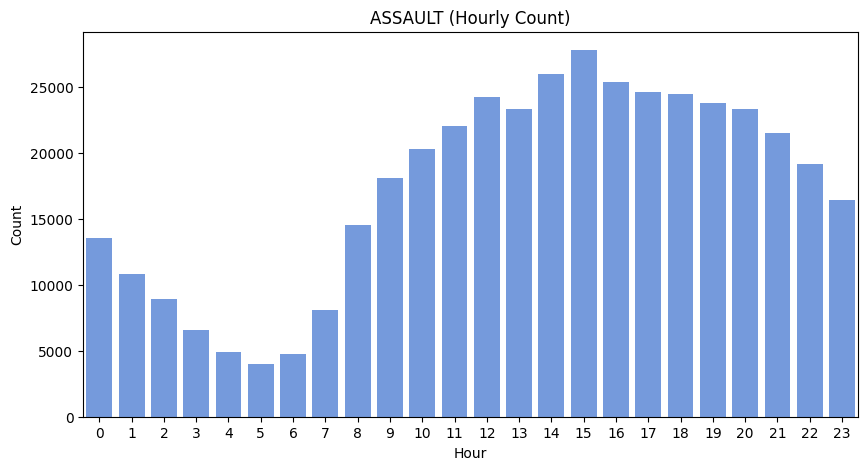

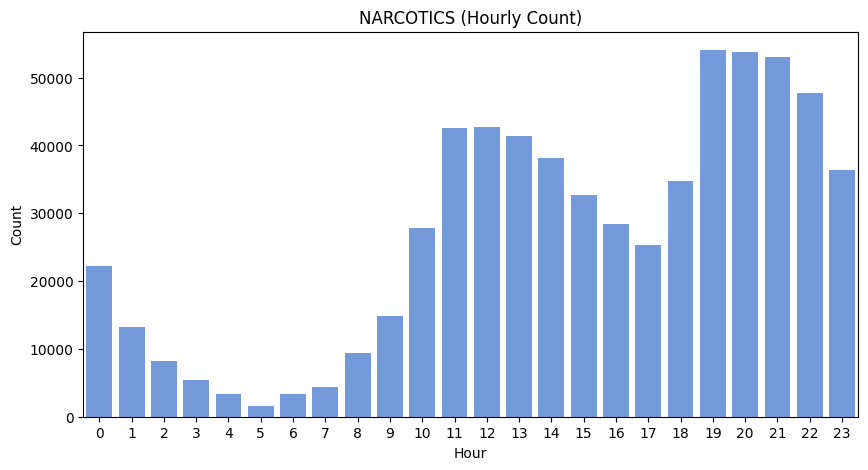

In [237]:
top_5_primary_types = df[df["rank"] <= 5]["Primary Type"].unique()
df_top_5 = df[df["Primary Type"].isin(top_5_primary_types)]

hourly_count = df_top_5.groupby(["Primary Type", "Hour"]).size().reset_index(name="Count")

for primary_type in top_5_primary_types:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=hourly_count[hourly_count["Primary Type"] == primary_type], x="Hour", y="Count", color="cornflowerblue")
    plt.title(f"{primary_type} (Hourly Count)")
    plt.xlabel("Hour")
    plt.ylabel("Count")
    plt.show()


In [243]:
beat_counts = df.groupby("Beat").size().reset_index(name="Incident Count")
beat_counts_sorted = beat_counts.sort_values(by="Incident Count", ascending=False)

print(beat_counts_sorted.head(20))

     Beat  Incident Count
45    423           50909
43    421           50654
68    624           46462
189  1533           45153
52    511           45120
227  1834           44532
131  1112           44061
95    823           43722
184  1522           41514
42    414           41449
300  2533           40473
65    621           40254
62    612           39721
31    321           38407
97    825           38020
75    713           37169
118  1011           37136
55    522           37107
69    631           37097
53    512           36906
